In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
df = pd.read_csv('car.csv')

In [43]:
print(df.head())

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms  Fuel_Type  Owner  \
0     ritz  2014           3.35           5.59       27000          0      0   
1      sx4  2013           4.75           9.54       43000          1      0   
2     ciaz  2017           7.25           9.85        6900          0      0   
3  wagon r  2011           2.85           4.15        5200          0      0   
4    swift  2014           4.60           6.87       42450          1      0   

   Selling_type_Individual_True  Transmission_Manual_True  
0                         False                      True  
1                         False                      True  
2                         False                      True  
3                         False                      True  
4                         False                      True  


In [44]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Car_Name                      301 non-null    object 
 1   Year                          301 non-null    int64  
 2   Selling_Price                 301 non-null    float64
 3   Present_Price                 301 non-null    float64
 4   Driven_kms                    301 non-null    int64  
 5   Fuel_Type                     301 non-null    int64  
 6   Owner                         301 non-null    int64  
 7   Selling_type_Individual_True  301 non-null    bool   
 8   Transmission_Manual_True      301 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(1)
memory usage: 17.2+ KB
None


In [45]:
print(df.describe())

              Year  Selling_Price  Present_Price     Driven_kms   Fuel_Type  \
count   301.000000     301.000000     301.000000     301.000000  301.000000   
mean   2013.627907       4.661296       7.628472   36947.205980    0.212625   
std       2.891554       5.082812       8.642584   38886.883882    0.425801   
min    2003.000000       0.100000       0.320000     500.000000    0.000000   
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000   
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000   
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000   
max    2018.000000      35.000000      92.600000  500000.000000    2.000000   

            Owner  
count  301.000000  
mean     0.043189  
std      0.247915  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      0.000000  
max      3.000000  


In [46]:
print(df.isnull().sum())

Car_Name                        0
Year                            0
Selling_Price                   0
Present_Price                   0
Driven_kms                      0
Fuel_Type                       0
Owner                           0
Selling_type_Individual_True    0
Transmission_Manual_True        0
dtype: int64


In [47]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Owner', 'Selling_type_Individual_True',
       'Transmission_Manual_True'],
      dtype='object')

In [48]:
print(df['Fuel_Type'].value_counts())

Fuel_Type
0    239
1     60
2      2
Name: count, dtype: int64


In [49]:
print(df['Transmission_Manual_True'].value_counts())

Transmission_Manual_True
True     261
False     40
Name: count, dtype: int64


In [50]:
print(df['Selling_type_Individual_True'].value_counts())

Selling_type_Individual_True
False    195
True     106
Name: count, dtype: int64


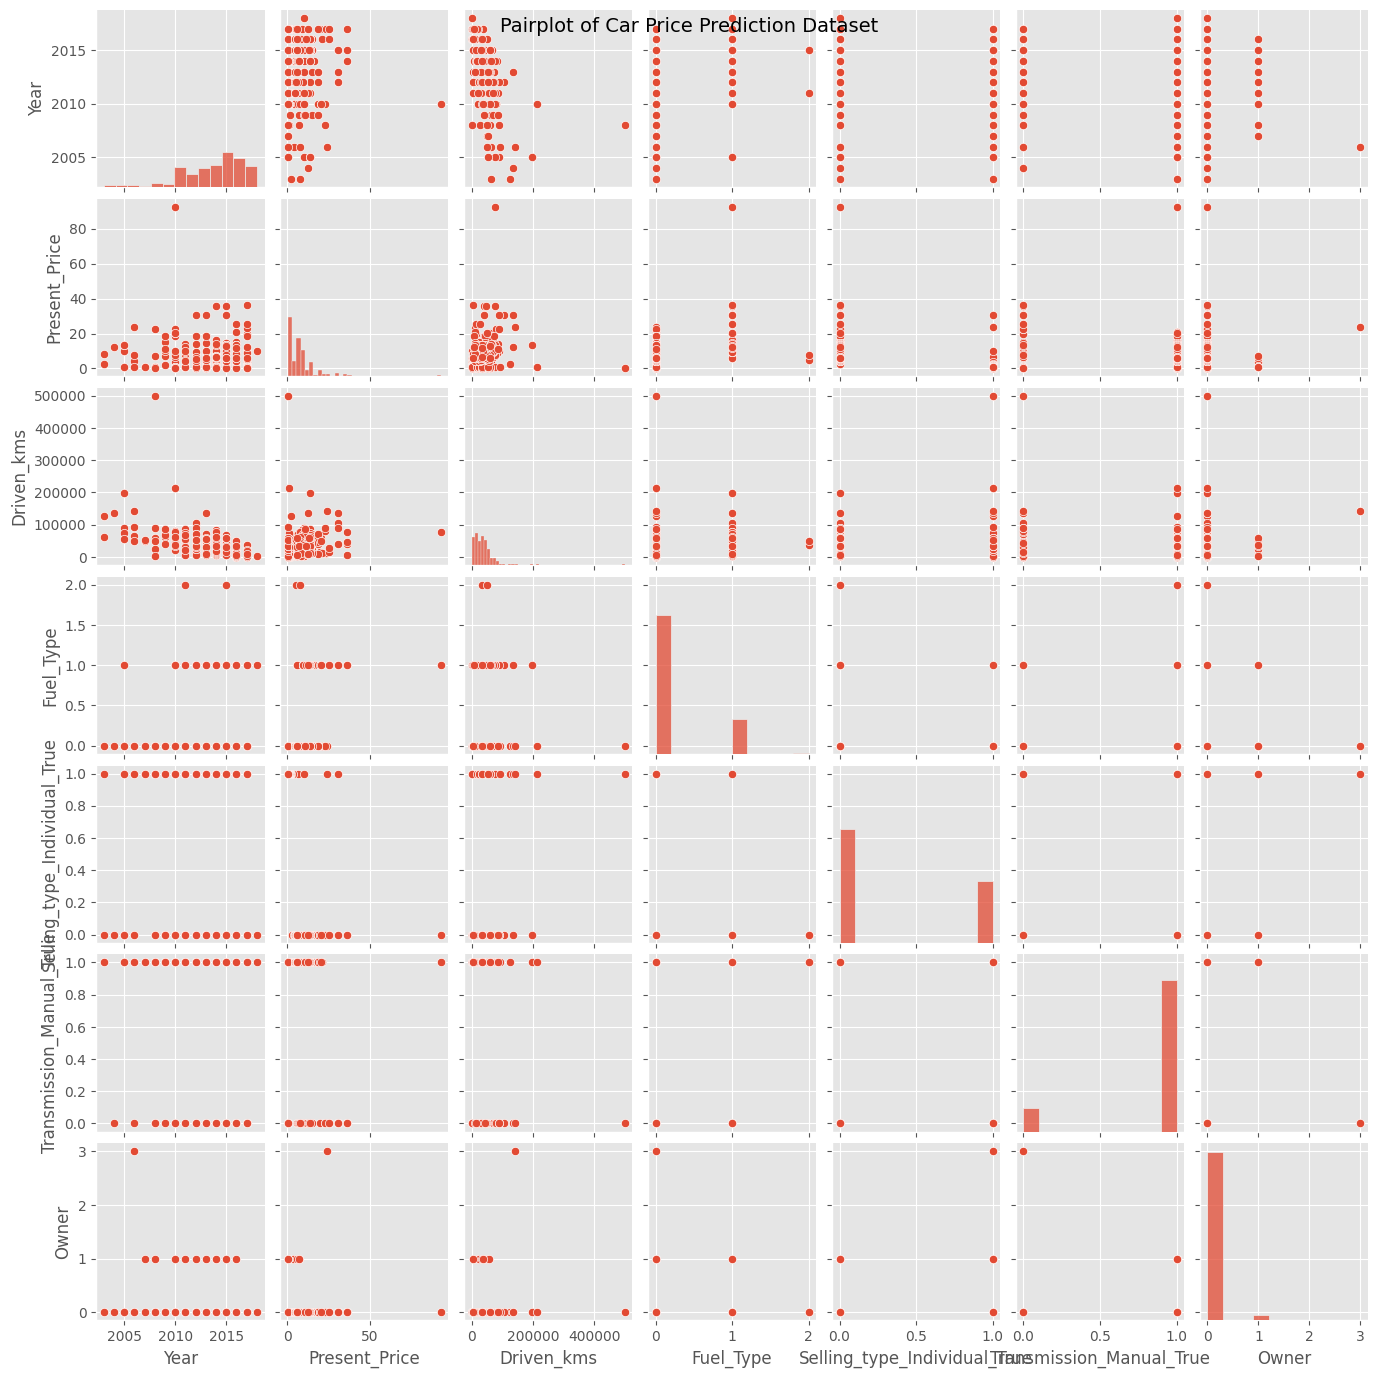

In [51]:
columns_to_plot = ["Year", "Present_Price", "Driven_kms", "Fuel_Type", "Selling_type_Individual_True", "Transmission_Manual_True", "Owner"]
sns.pairplot(df[columns_to_plot], diag_kind="hist", height=2)
plt.suptitle("Pairplot of Car Price Prediction Dataset", fontsize=14)
plt.show()

In [52]:
fuel_type = df['Fuel_Type']
selling_type = df['Selling_type_Individual_True']
transmission_type = df['Transmission_Manual_True']
selling_price = df['Selling_Price']

In [53]:
from matplotlib import style

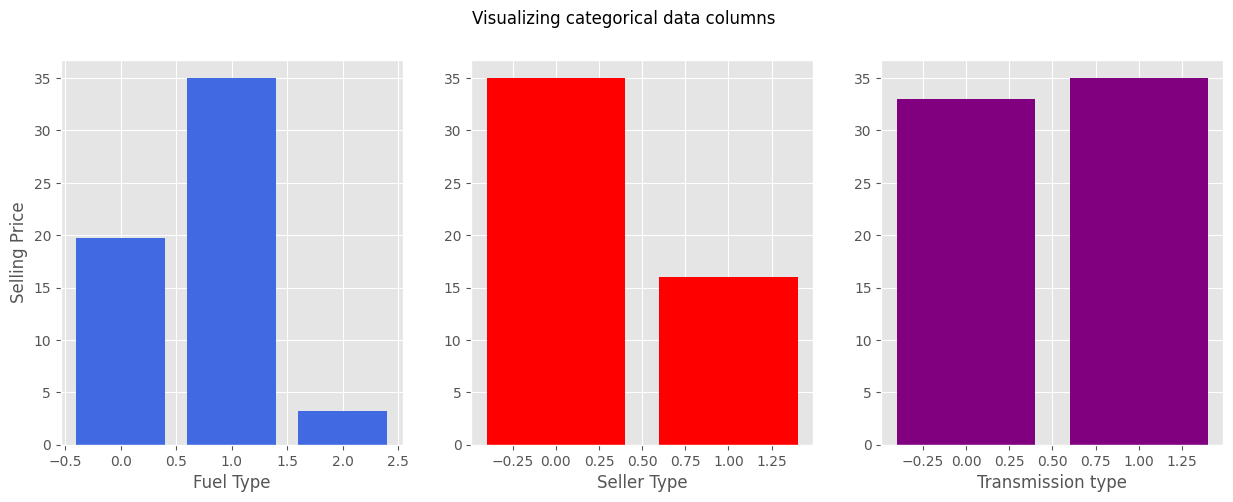

In [54]:
style.use('ggplot')
fig = plt.figure(figsize=(15,5))
fig.suptitle('Visualizing categorical data columns')
plt.subplot(1,3,1)
plt.bar(fuel_type,selling_price, color='royalblue')
plt.xlabel("Fuel Type")
plt.ylabel("Selling Price")
plt.subplot(1,3,2)
plt.bar(selling_type, selling_price, color='red')
plt.xlabel("Seller Type")
plt.subplot(1,3,3)
plt.bar(transmission_type, selling_price, color='purple')
plt.xlabel('Transmission type')
plt.show()

<Axes: xlabel='Transmission_Manual_True', ylabel='Selling_Price'>

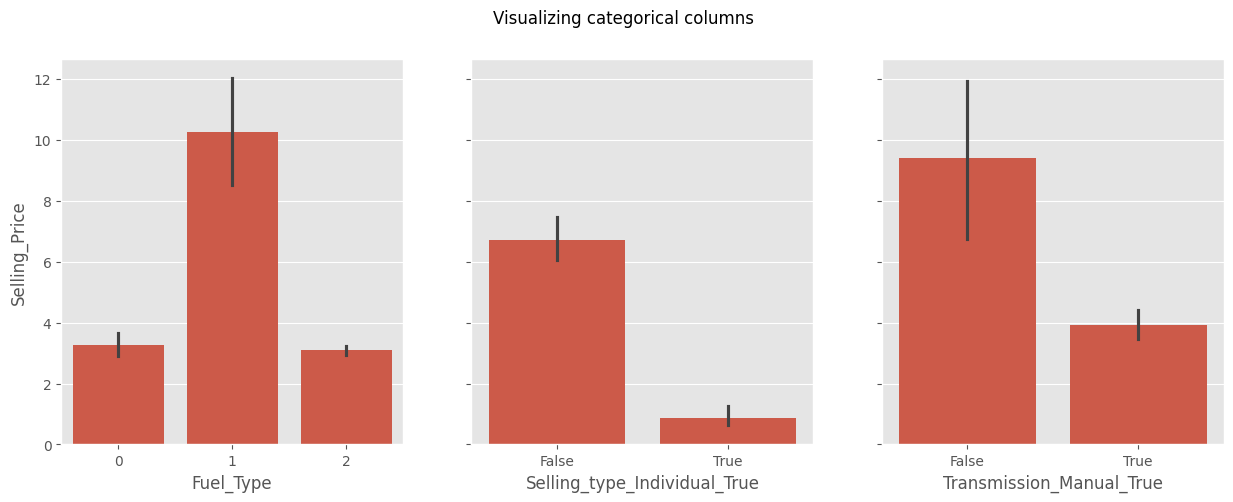

In [55]:
fig, axes = plt.subplots(1,3,figsize=(15,5), sharey=True)
fig.suptitle('Visualizing categorical columns')
sns.barplot(x=fuel_type, y=selling_price, ax=axes[0])
sns.barplot(x=selling_type, y=selling_price, ax=axes[1])
sns.barplot(x=transmission_type, y=selling_price, ax=axes[2])

In [ ]:
petrol_data = df.groupby('Fuel_Type').get_group('Petrol')
petrol_data.describe()

In [ ]:
seller_data = df.groupby('Selling_type_Individual_True').get_group('Dealer')
seller_data.describe()

In [74]:
df.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)

In [78]:
df = pd.get_dummies(df, columns=['Selling_type_Individual_True', 'Transmission_Manual_True'], drop_first=True)

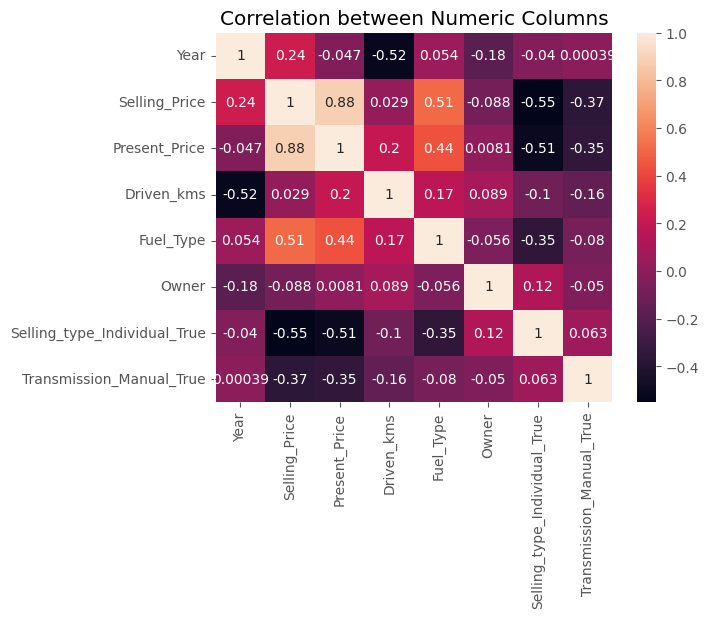

In [73]:
import pandas as pd
import seaborn as sns
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation between Numeric Columns")
plt.show()

<Axes: title={'center': 'Correlation between present price and selling price'}, xlabel='Present_Price', ylabel='Selling_Price'>

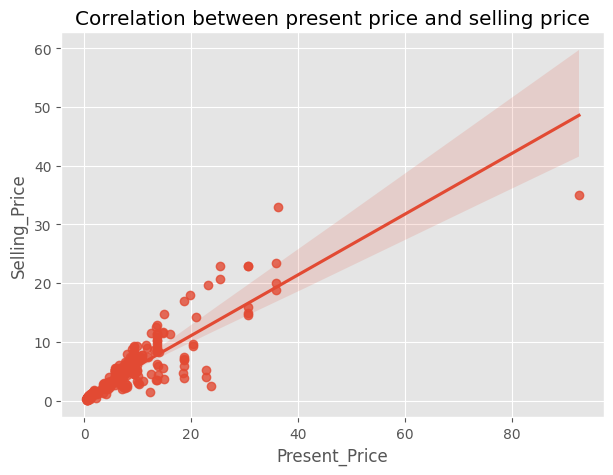

In [57]:
fig=plt.figure(figsize=(7,5))
plt.title('Correlation between present price and selling price')
sns.regplot(x='Present_Price', y='Selling_Price', data=df)

In [58]:
X = df.drop(['Car_Name','Selling_Price'], axis=1)
y = df['Selling_Price']

In [59]:
print("Shape of X is: ",X.shape)
print("Shape of y is: ", y.shape)

Shape of X is:  (301, 7)
Shape of y is:  (301,)


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [61]:
print("X_test shape:", X_test.shape)
print("X_train shape:", X_train.shape)
print("y_test shape: ", y_test.shape)
print("y_train shape:", y_train.shape)

X_test shape: (91, 7)
X_train shape: (210, 7)
y_test shape:  (91,)
y_train shape: (210,)


In [62]:
scaler = StandardScaler()

In [63]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [64]:
model = LinearRegression()

In [65]:
model.fit(X_train, y_train)

LinearRegression()

In [66]:
pred = model.predict(X_test)

In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE: ", (metrics.mean_absolute_error(pred, y_test)))
print("MSE: ", (metrics.mean_squared_error(pred, y_test)))
print("R2 score: ", (metrics.r2_score(pred, y_test)))

MAE:  1.2581987927234453
MSE:  3.49536888601346
R2 score:  0.8293505189461544


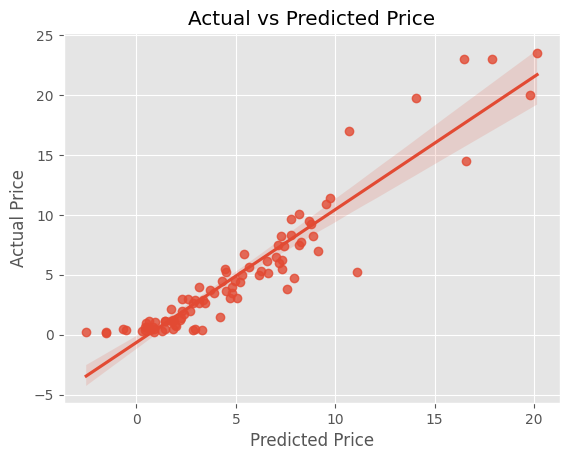

In [68]:
sns.regplot(x=pred, y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel('Actual Price')
plt.title("Actual vs Predicted Price")
plt.show()